### Import Necessary Module and Set Path 

In [19]:
import sqlite3 as lite
import os
import sys
import collections
import matplotlib.pyplot as plt
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [12]:
import analysis as an

## Run Cyclus Input file

### The output file should be named 
         
          eu_future.sqlite

In [13]:
# dictionary to hold data for plotting:
astrid_fuel_from_uox = {}
uox_reprocessed = {}
avg_reprocess_capacity = {}
max_reprocess_capacity = {}
uox_avg_reprocess_capacity = {}
uox_max_reprocess_capacity = {}

In [5]:
! cyclus 108br.xml -o 108br.sqlite
! cyclus 111br.xml -o 111br.sqlite
! cyclus 115br.xml -o 115br.sqlite
! cyclus 118br.xml -o 118br.sqlite
! cyclus 5yr_108.xml -o 5yr_108.sqlite
! cyclus 10yr_108.xml -o 10yr_108.sqlite
! cyclus 20yr_108.xml -o 20yr_108.sqlite

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject 

Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Further Experimental Warnings will be suppressed.

Status: Cyclus run successful!
Output location: 5yr_108.sqlite
Simulation ID: 5334a3d7-a1b5-40f0-919a-4e0af5cb0eb7
              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject 

In [14]:
cur_108br = an.cursor('108br.sqlite')
cur_111br = an.cursor('111br.sqlite')
cur_115br = an.cursor('115br.sqlite')
cur_118br = an.cursor('118br.sqlite')

In [15]:
# Pu Composition in Spent Fuels:
pu_frac_spent_uox = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "uox_used_fuel_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
obr = cur_108br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
fivebr = cur_115br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.15" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
onebr = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.11" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
eightbr = cur_118br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.18" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
br_dict = {1.08: obr[0], 1.11: onebr[0], 1.15: fivebr[0], 1.18: eightbr[0]}
for key, val in br_dict.items():
    print(key, val)

1.08 0.27431405161777184
1.11 0.2927282490909536
1.15 0.3012337276327513
1.18 0.310254559737049


In [16]:
import numpy as np

# generate breeding ratio plots

total_monthly_rep_dict = {}
cum_lwr_unf_rep_dict = {}

file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = br_dict[1.08]
    if '111' in file:
        used_comp = br_dict[1.11]
    if '115' in file:
        used_comp = br_dict[1.15]
    if '118' in file:
        used_comp = br_dict[1.18]
    
    
    print(file)
    name = file.replace('.sqlite', '')
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_fuel_legacy', 'astrid_fuel_new'],
                                                 True, False)
    # lwr UNF reprocessing
    rep_for_uox = [(x * 0.22 / pu_frac_spent_uox[0]) for x in fuel_timeseries['astrid_fuel_legacy']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x * 0.22 / used_comp) for x in fuel_timeseries['astrid_fuel_new']]
    
    total_monthly_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
    
    # total lwr UNF reprocessed
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                     ['astrid_fuel_legacy'], False, True)
    lwr_unf_rep = [(x * 0.22 / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['astrid_fuel_legacy']]
    cum_lwr_unf_rep_dict[name] = lwr_unf_rep
    
    

108br.sqlite
111br.sqlite
115br.sqlite
118br.sqlite


In [17]:
import numpy as np

# generate breeding ratio plots

total_monthly_rep_dict = {}
cum_monthly_rep_dict = {}
cum_lwr_unf_rep_dict = {}


file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = br_dict[1.08]
    if '111' in file:
        used_comp = br_dict[1.11]
    if '115' in file:
        used_comp = br_dict[1.15]
    if '118' in file:
        used_comp = br_dict[1.18]
    
    
    print(file)
    name = file.replace('.sqlite', '')
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_Pu', 'uox_Pu'],
                                                 False, False)
    # lwr UNF reprocessing
    rep_for_uox = [(x / pu_frac_spent_uox[0]) for x in fuel_timeseries['uox_Pu']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x / used_comp) for x in fuel_timeseries['astrid_Pu']]
    
    total_monthly_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
    
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_Pu', 'uox_Pu'],
                                                 False, True)
    cum_rep_for_uox = [(x / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['uox_Pu']]
    cum_rep_for_astrid = [(x / used_comp) for x in cum_fuel_timeseries['astrid_Pu']]
    cum_monthly_rep_dict[name] = [x+y for x,y in zip(cum_rep_for_uox, cum_rep_for_astrid)]
    
    # total lwr UNF reprocessed
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                     ['astrid_fuel_legacy'], True, True)
    lwr_unf_rep = [(x * 0.22 / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['astrid_fuel_legacy']]
    cum_lwr_unf_rep_dict[name] = lwr_unf_rep
    
    

108br.sqlite
111br.sqlite
115br.sqlite
118br.sqlite


108br 159804.05640306242
111br 156832.616176762
115br 155603.3338280241
118br 154318.6624362421


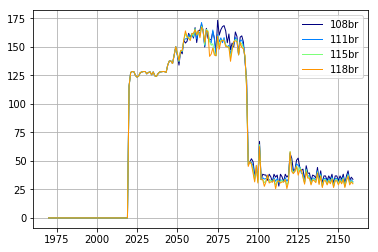

In [20]:
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in total_monthly_rep_dict.items():
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    print(key, sum(val))
plt.legend()
plt.grid()
plt.show()


108br 159804.05640306242
111br 156832.616176762
115br 155603.3338280241
118br 154318.6624362421


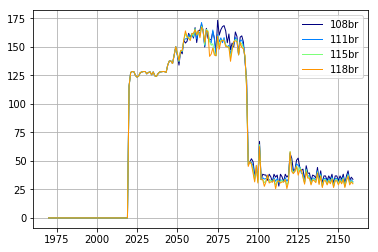

In [21]:
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in total_monthly_rep_dict.items():
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    print(key, sum(val))
plt.legend()
plt.grid()
plt.show()


Percent reduction in total LWR UNF reprocessed
108br 0.0
111br 4.952380952380963
115br 8.000000000000018
118br 9.714285714285719


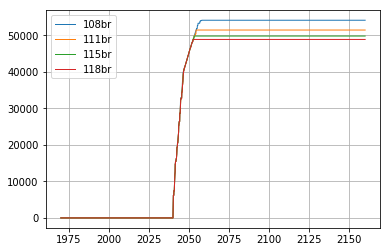

In [22]:
# cumulative LWR UNF reprocessed
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
print('Percent reduction in total LWR UNF reprocessed')
for key, val in cum_lwr_unf_rep_dict.items():
    plt.plot(years, val, label=key, linewidth=1)
    print(key, (1- max(val)/max(cum_lwr_unf_rep_dict['108br'])) * 100 )
plt.legend()
plt.grid()
plt.show()


In [50]:
# generate lifetime extension plots and metrics
file_list = ['108br.sqlite', '5yr_108.sqlite', '10yr_108.sqlite', '20yr_108.sqlite']
# file_list = ['5yr_108.sqlite', '10yr_108.sqlite', '20yr_108.sqlite']

metric_dict = {}
for file in file_list:
    if '_' in file:
        indx = file.find('_')
        name = file[:indx]
    else:
        name = 'base'
    
    print(name)
    cursor = an.cursor(file)
    metric_dict[name] = {}
    init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_fuel_legacy', 'astrid_fuel_new'],
                                                 True, False)
    lwr_unf_reprocessing = np.array(fuel_timeseries['astrid_fuel_legacy']) * 0.22 / pu_frac_spent_uox
    sfr_unf_reprocessing = np.array(fuel_timeseries['astrid_fuel_new']) * 0.22 / obr
    metric_dict[name]['fuel from used uox'] = sum(fuel_timeseries['astrid_fuel_legacy'])
    metric_dict[name]['fuel from used mox'] = sum(fuel_timeseries['astrid_fuel_new'])
    metric_dict[name]['total fuel'] = metric_dict[name]['fuel from used uox'] + metric_dict[name]['fuel from used mox']
    metric_dict[name]['lwr unf reproc'] = sum(lwr_unf_reprocessing)
    metric_dict[name]['sfr unf reproc'] = sum(sfr_unf_reprocessing)
    total = sum(lwr_unf_reprocessing) + sum(sfr_unf_reprocessing)
    
    last_lwr_demand = [i for i, e in enumerate(lwr_unf_reprocessing) if e != 0][-1]
    first_sfr_demand = [i for i, e in enumerate(sfr_unf_reprocessing) if e!=0][0]
    print(first_sfr_demand)
    print(sum(sfr_unf_reprocessing))
    rep_start = 600
    metric_dict[name]['last lwr demand'] = init_year + last_lwr_demand/12
    metric_dict[name]['avg lwr unf reproc'] = sum(lwr_unf_reprocessing) / (last_lwr_demand - rep_start)
    metric_dict[name]['avg sfr unf reproc'] = sum(sfr_unf_reprocessing) / (2280 - first_sfr_demand)
    metric_dict[name]['avg tot unf reproc'] = total / (2280 - rep_start)
    
    if 'yr' in name:
        name = name + '_ext'
    plot = plt.bar(x=an.timestep_to_years(init_year, timestep),
                   height=fuel_timeseries['astrid_fuel_legacy'],
                   width=0.5,
                   color=cm.viridis(0),
                   edgecolor='none')
    plot2 = plt.bar(x=an.timestep_to_years(init_year, timestep),
                    height=fuel_timeseries['astrid_fuel_new'],
                    width=0.5,
                    color=cm.viridis(1/2),
                    edgecolor='none',
                    bottom=fuel_timeseries['astrid_fuel_legacy'])
    plt.xlabel('Years')
    plt.ylabel('Mass[MTHM]')
    plt.title(name.replace('_', ' '))
    plt.grid()
    plt.savefig(name+'.png', bbox_inches='tight')
    plt.close()

base
891
48598.45713837397
5yr
892
46638.08567060336
10yr
895
43717.62339287706
20yr
895
39720.96630026995


In [46]:
for key in metric_dict['base'].keys():
    print('\n')
    print(key)
    if key == 'last lwr demand':
        for key2 in metric_dict.keys():
            print(key2)
            print(metric_dict[key2][key])
    else:
        for key2 in metric_dict.keys():
            print(key2)
            print(metric_dict[key2][key]/ metric_dict['base'][key] - 1)



fuel from used uox
base
0.0
5yr
0.0565302144249471
10yr
0.05458089668615407
20yr
0.04483430799219734


fuel from used mox
base
0.0
5yr
-0.040338142056413284
10yr
-0.10043186621335398
20yr
-0.18267021960855978


total fuel
base
0.0
5yr
-0.03597753597753128
10yr
-0.09345384345383756
20yr
-0.1724289224289186


lwr unf reproc
base
0.0
5yr
0.056530214424948655
10yr
0.054580896686156954
20yr
0.044834307992200007


sfr unf reproc
base
0.0
5yr
-0.040338142056420834
10yr
-0.10043186621336053
20yr
-0.1826702196085611


last lwr demand
base
2056.3333333333335
5yr
2057.9166666666665
10yr
2061.75
20yr
2071.75


avg lwr unf reproc
base
0.0
5yr
0.012411370306104619
10yr
-0.08224097613739634
20yr
-0.26642873062061323


avg sfr unf reproc
base
0.0
5yr
-0.039646743023320274
10yr
-0.09783383550206326
20yr
-0.18030970038721394


avg tot unf reproc
base
0.0
5yr
0.010136898624578672
10yr
-0.01965961201565347
20yr
-0.06412479669774107
